<a href="https://colab.research.google.com/github/steveLim0928/Foundation-in-ML/blob/main/Probabilistic_approach_to_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats

In [2]:
import seaborn as sns
#sns.set()
sns.set(color_codes=True)

**Uncertainty and probability**

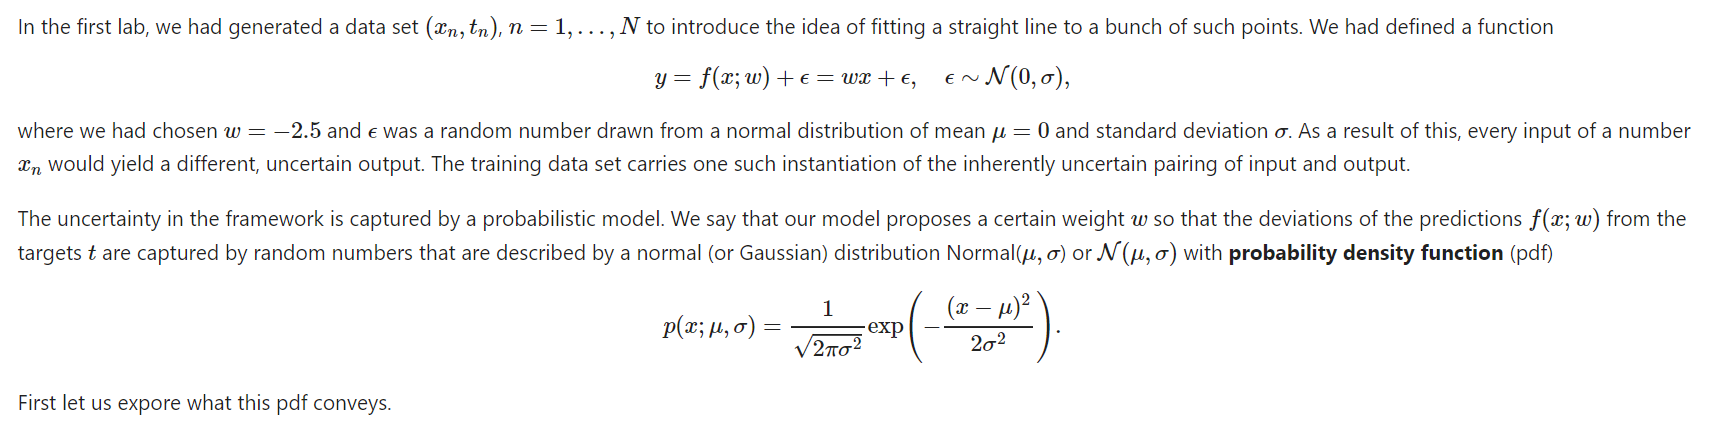

In [3]:
def gaussian(x, mean, stdev):
    return np.exp(-((x-mean)**2)/(2*stdev**2))/(np.sqrt(2*np.pi)*stdev)

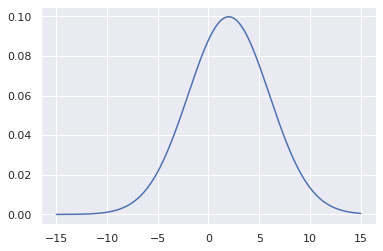

In [4]:
x = np.linspace(-15, 15, 250)
plt.plot(x, gaussian(x, 2, 4))

In [5]:
import scipy.integrate as integrate
print(integrate.quad(lambda x: gaussian(x, 0, 1), -1,1 ))

(0.682689492137086, 7.579375928402476e-15)


Text(0.5, 1.0, 'Area under the curve gives probability -- here 90% probability limits')

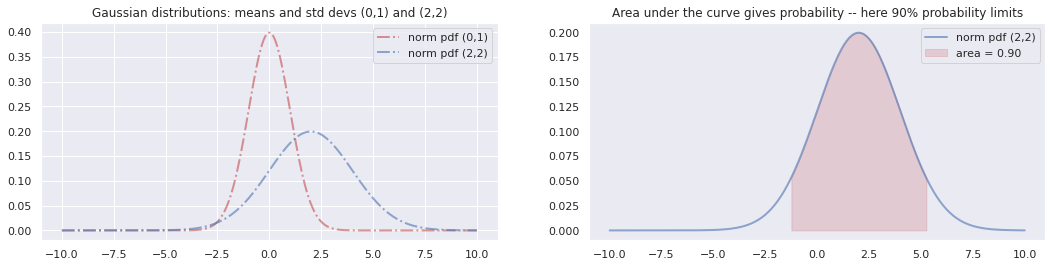

In [6]:
# create grid of 150 points from -3, 5
x = np.linspace(-10, 10, 250)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
ax[0].plot(x, stats.norm.pdf(x), 'r-.', lw=2, alpha=0.6, label='norm pdf (0,1)')
ax[0].plot(x, stats.norm.pdf(x, 2, 2), 'b-.', lw=2, alpha=0.6, label='norm pdf (2,2)')
ax[0].legend()
ax[0].set_title("Gaussian distributions: means and std devs (0,1) and (2,2)")
x_90_idx = (x > stats.norm.ppf(0.05, 2, 2)) & (x < stats.norm.ppf(0.95, 2, 2))
ax[1].grid(False)
ax[1].plot(x, stats.norm.pdf(x, 2, 2), 'b-', lw=2, alpha=0.6,  label='norm pdf (2,2)')
ax[1].fill_between(x[x_90_idx], stats.norm.pdf(x[x_90_idx], 2, 2), color='r', alpha=.2, label='area = 0.90')
ax[1].legend()
ax[1].set_title("Area under the curve gives probability -- here 90% probability limits")

In [7]:
(x_lo, x_hi) = (stats.norm.ppf(0.05, 2, 2), stats.norm.ppf(0.95, 2, 2))
print("Range of x-values that account for 90% of probability of occurrence = (", x_lo, "," , x_hi, ")")
print("Confirm (by eye) that these values are at the limits of the domain of the function plotted above (right).")

Range of x-values that account for 90% of probability of occurrence = ( -1.2897072539029457 , 5.289707253902945 )
Confirm (by eye) that these values are at the limits of the domain of the function plotted above (right).


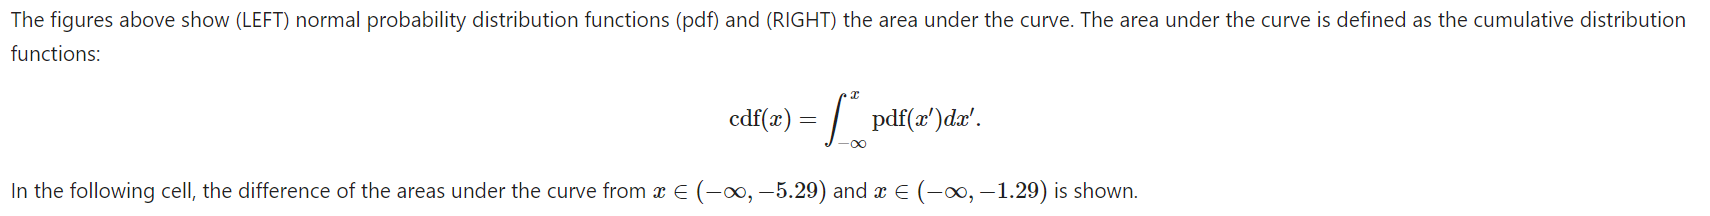

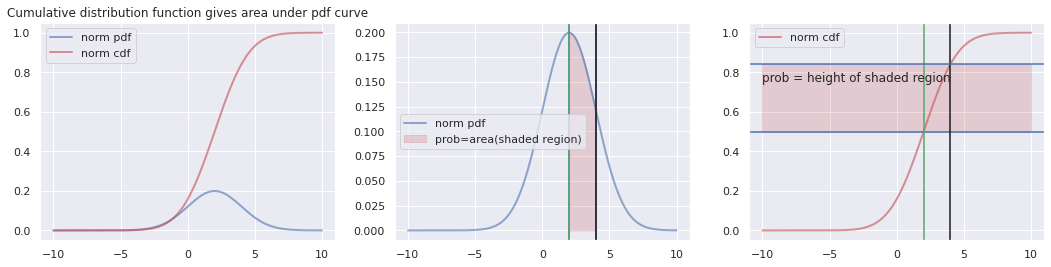

In [8]:
x = np.linspace(-10, 10, 250)
x1 = np.linspace(3, 4, 50)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
ax[0].plot(x, stats.norm.pdf(x, 2, 2), 'b-', lw=2, alpha=0.6, label='norm pdf')
ax[0].plot(x, stats.norm.cdf(x, 2, 2), 'r-', lw=2, alpha=0.6, label='norm cdf')
ax[0].set_title("Cumulative distribution function gives area under pdf curve")
ax[0].legend()
ax[1].plot(x, stats.norm.pdf(x, 2, 2), 'b-', lw=2, alpha=0.6, label='norm pdf')
x1 = np.linspace(2, 4, 50) # want to graphically 
ax[1].axvline(2)
ax[1].axvline(4)
ax[1].fill_between(x1, stats.norm.pdf(x1, 2, 2), color='r', alpha=.2, label='prob=area(shaded region)')
ax[1].legend()
ax[2].plot(x, stats.norm.cdf(x, 2, 2), 'r-', lw=2, alpha=0.6, label='norm cdf')
# put vertical and horizontal lines at x=2, pdf(x=2)
ax[1].axvline(2, color = 'g')
ax[1].axvline(4, color = 'k')
y_2 = stats.norm.cdf(2,2,2)
ax[2].axhline(y_2)
# put vertical and horizontal lines at x=4, pdf(x=4)
ax[2].axvline(2, color = 'g')
ax[2].axvline(4, color = 'k')
y_4 = stats.norm.cdf(4,2,2)
ax[2].axhline(y_4)
ax[2].text(-10,.75,"prob = height of shaded region")

ax[2].fill_between(x, y_2, y_4, color='r', alpha=0.2)
ax[2].legend()

**Relating pdf and cdf**

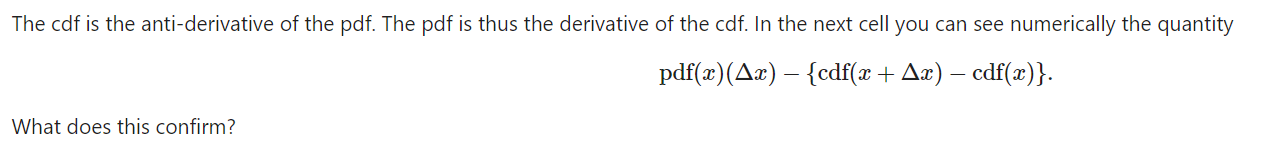

In [9]:
delta_xs = [0.1**i for i in range(10)]
for delta_x in delta_xs:
    print(stats.norm.pdf(3.,2,2)*delta_x - (stats.norm.cdf(3.+delta_x, 2, 2) - stats.norm.cdf(3, 2, 2)))

0.026150378587619955
0.00022541440057445572
2.205896692277203e-06
2.2009582686580544e-08
2.2004626755705442e-10
2.2003796248540395e-12
2.1918663767514547e-14
2.7118054282644494e-16
8.262920572069747e-17
3.046738106457288e-17


**Linear regression from a probabilistic viewpoint: maximum likelihood estimation**

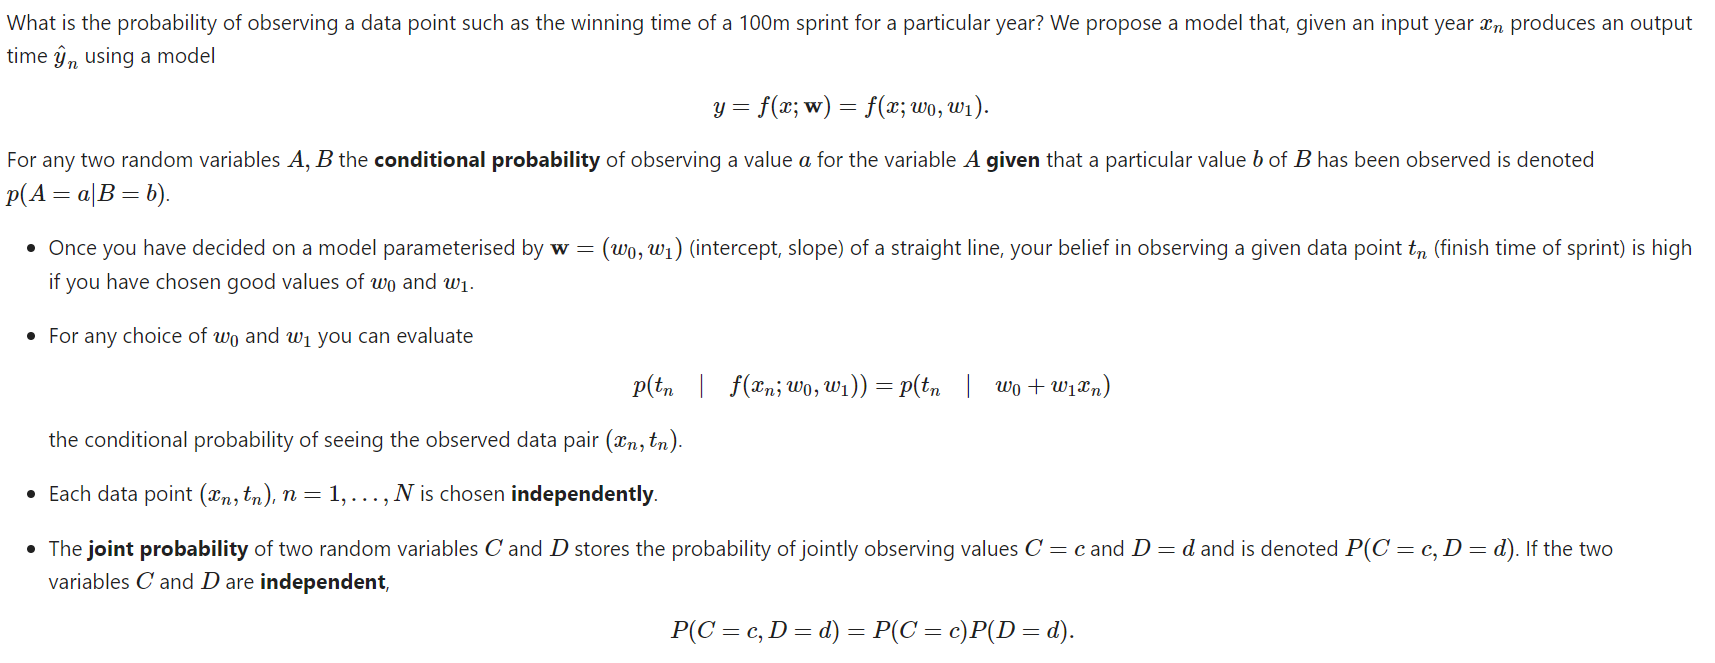

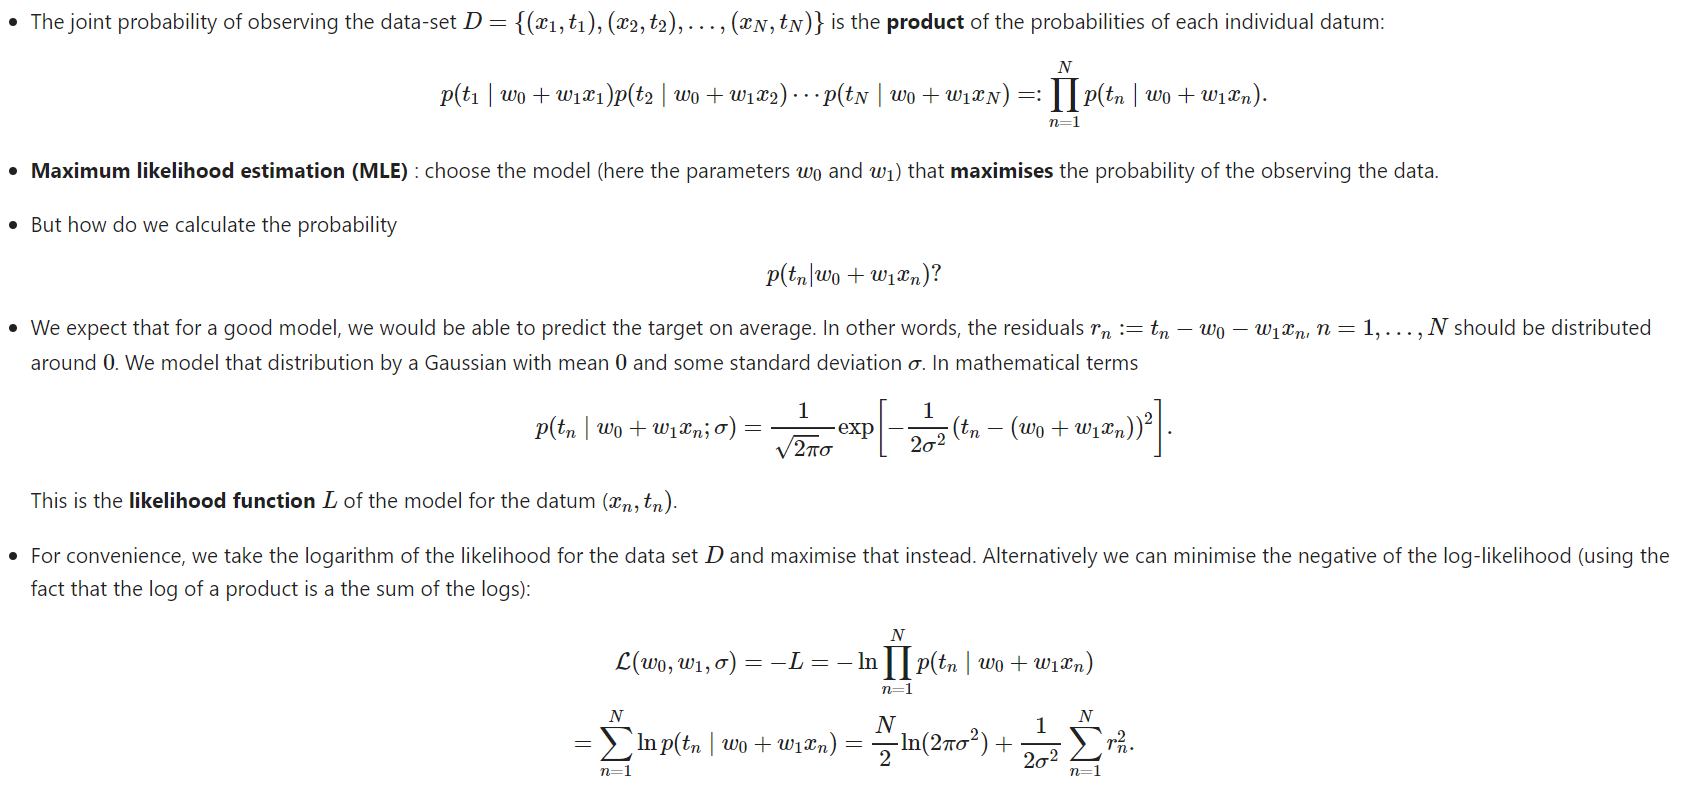

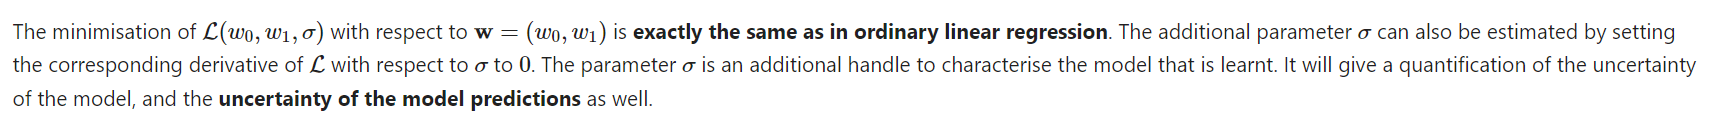

In [10]:
# Let us return to the women's 100m sprint times and fit a straight line through the data
olympics100f=np.asarray([
0, 11.90,
1, 11.50,
2, 11.50,
3, 11.00,
4, 11.40,
5, 11.08,
6, 11.07,
7, 11.08,
8, 11.06,
9, 10.97,
10, 10.54,
11, 10.82,
12, 10.94,
13, 10.75,
14, 10.93,
15, 10.78,
16, 10.75,
17, 10.71])
odate_f = olympics100f[::2]
otime_f = olympics100f[1::2]

11.494210526315785 -0.05304437564499428


Text(0.5, 1.0, 'The data that the learnt function produces does not look like the real data')

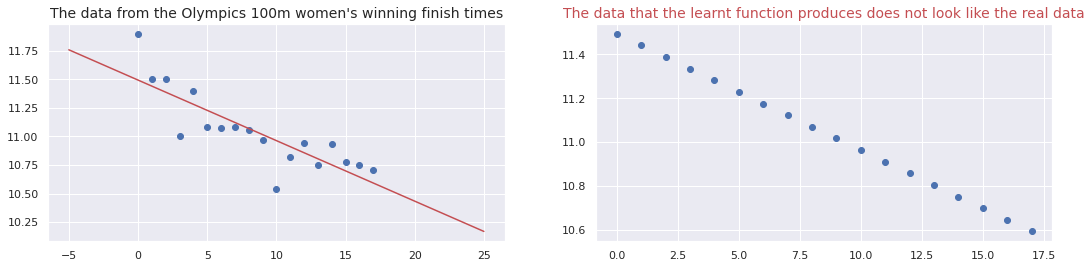

In [11]:
def linear_fit(X,y):
    num = (X*y).mean() - (X.mean()*y.mean())
    den = (X**2).mean() - (X.mean())**2
    w1 = num/den
    w0 = y.mean() - w1*X.mean()
    return w0, w1
w0fit, w1fit = linear_fit(odate_f, otime_f)
def learnt_fn(Xvariable, Xdata, ydata): #learning model
    X = Xvariable
    w_hat = linear_fit(Xdata, ydata)
    fn = 0.
    for i in range(len(w_hat)):
        fn += w_hat[i]*X**i # w0 + w1*x
    return fn

print(w0fit, w1fit)
x = np.linspace(-5, 25, 250)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
ax[0].scatter(odate_f, otime_f)
ax[0].plot(x, learnt_fn(x, odate_f, otime_f), c='r')
ax[0].set_title("The data from the Olympics 100m women's winning finish times", fontsize=14)
ax[1].scatter(odate_f, learnt_fn(odate_f, odate_f, otime_f) )
ax[1].set_title("The data that the learnt function produces does not look like the real data", fontsize=14, color='r')

**Calculating likelihoods**

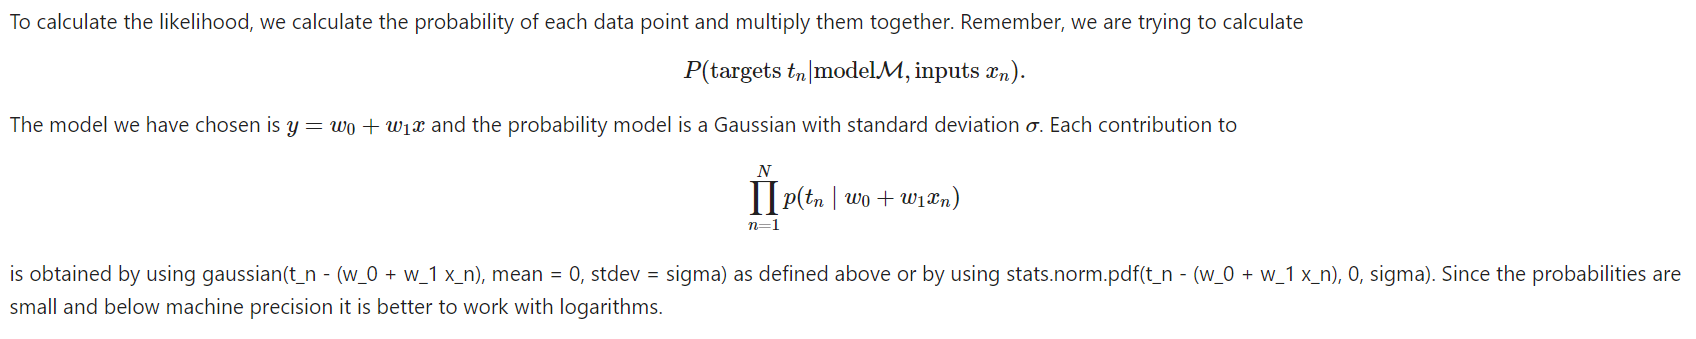

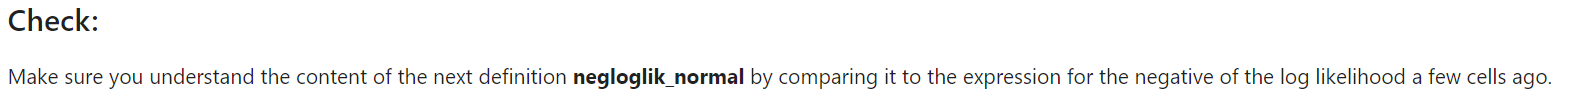

In [13]:
def negloglik_normal(X, y, w0, w, sigma): # - log likelihood expression
    loglik = 0 # NOTE: this has been corrected
    for x1, y1 in zip(X, y):
        prediction1 = w0 + np.dot(w, x1) #w0 + w1*x
        residual = y1 - prediction1 # tn - w0 - w1*x
        loglik += np.log(stats.norm.pdf(residual, 0, sigma)) # computes log(probability of residual) assuming gaussian
    return -loglik 

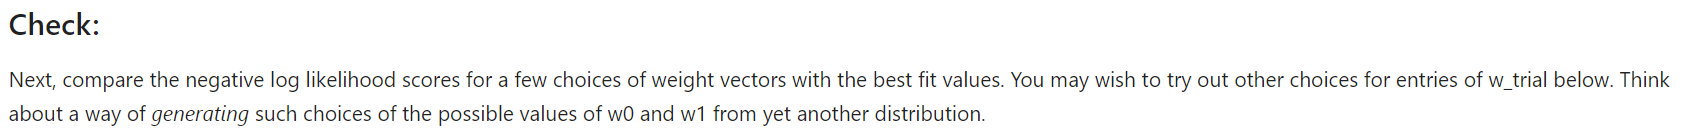

In [14]:
w0best, w1best = linear_fit(odate_f, otime_f) # linear regression fit
w_trial = np.array([[12.0, -.1], [11.5, -.03], [12.5, -.03], [11.0,-.07],  [w0best, w1best]])
for w0, w1 in w_trial:
    nll = negloglik_normal(odate_f, otime_f, w0, w1, .05)
    print((w0,w1), nll)

(12.0, -0.1) 338.2577126737121
(11.5, -0.03) 281.5177126737122
(12.5, -0.03) 5333.517712673712
(11.0, -0.07) 1578.3977126737134
(11.494210526315785, -0.05304437564499428) 83.64962185843893
